In [85]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
df=pd.read_csv("Corpus_to_test.csv",encoding='latin-1')
df.head()

,S.No,Question,Category,Answers
0,1,I am unable to connect to admission department.,Admission,You can write to admissions@reva.edu.in. One o...
1,2,What are the UG courses offered?,Admission,"Computer Applications, Arts and Humanity, Law..."
2,3,What are the Computer Applications courses off...,Admission,Bachelor of Computer Applications (BCA)
3,4,What are the Arts and Humanity courses offered...,Admission,"1.\tBA in Political Science, Economics and Jou..."
4,5,What are the Law courses offered in UG,Admission,1.\tBachelor of Arts and Bachelor of Laws (B.A...


# Dataset exploration

In [87]:
df.isnull().sum()

S.No        0
Question    0
Category    0
Answers     0
dtype: int64

In [88]:
df = df.dropna(how='any',axis=0) 

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 639
Data columns (total 4 columns):
S.No        640 non-null int64
Question    640 non-null object
Category    640 non-null object
Answers     640 non-null object
dtypes: int64(1), object(3)
memory usage: 25.0+ KB


In [90]:
df['Category'].value_counts()

Admission                         148
Academics                          74
RACE                               72
Hostel                             52
UG Courses                         51
HR                                 50
ERP Support                        34
PG Courses                         33
Examination                        26
Greetings                          25
About REVA                         22
Finance                            20
Certificate/Diploma/PG Diploma     18
Ph.D.                              15
Name: Category, dtype: int64

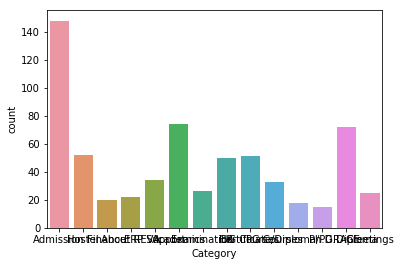

In [91]:
sns.countplot(x='Category', data=df)

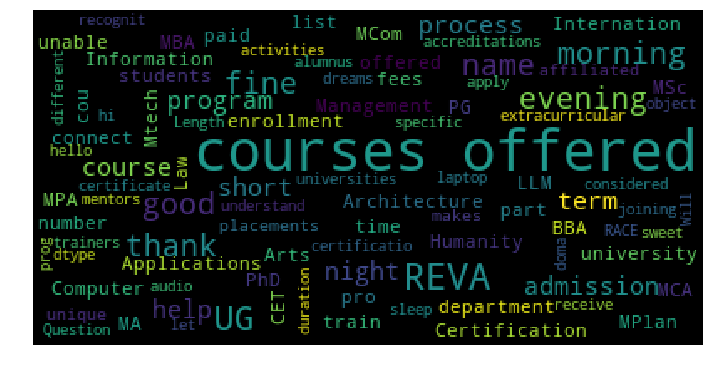

In [92]:
##### Now let's create a wordcloud to get a better understanding of our corpus
import matplotlib.pyplot as plt
from wordcloud import WordCloud
##### Download using conda install -c conda-forge wordcloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df['Question'])

In [93]:
##### List of Questions to list of words for better visualization
word_list=[]
list_question=list(df["Question"])
for sentence in list_question:
    words_sentence=sentence.split()
    for words in words_sentence:
        word_list.append(words)


word_list=[word for sentence in list(df["Question"]) for word in sentence.split()]
print(word_list)

['I', 'am', 'unable', 'to', 'connect', 'to', 'admission', 'department.', 'What', 'are', 'the', 'UG', 'courses', 'offered?', 'What', 'are', 'the', 'Computer', 'Applications', 'courses', 'offered', 'in', 'UG?', 'What', 'are', 'the', 'Arts', 'and', 'Humanity', 'courses', 'offered', 'in', 'UG', 'What', 'are', 'the', 'Law', 'courses', 'offered', 'in', 'UG', 'What', 'are', 'the', 'Architecture', 'courses', 'offered', 'in', 'UG', 'What', 'are', 'the', 'Certification', 'program', 'offered', 'in', 'UG', 'What', 'are', 'the', 'Management', '(BBA)', 'courses', 'offered', 'in', 'UG', 'What', 'are', 'the', 'PG', 'courses', 'offered?', 'What', 'are', 'the', 'Mtech', 'courses', 'offered?', 'What', 'are', 'the', 'MA', 'courses', 'offered?', 'What', 'are', 'the', 'MSc', 'courses', 'offered?', 'What', 'are', 'the', 'MPlan', 'courses', 'offered?', 'What', 'are', 'the', 'MCom', 'courses', 'offered?', 'What', 'are', 'the', 'MPA', 'courses', 'offered?', 'What', 'are', 'the', 'MCA', 'courses', 'offered?', 'W

In [94]:
from collections import Counter
#####  frequency of each word and the most common words in the dataset
frequency=Counter(word_list)
print (frequency)
print (frequency.most_common(5))

Counter({'the': 251, 'you': 166, 'Do': 162, 'What': 143, 'offer': 123, 'is': 117, 'for': 110, 'I': 109, 'in': 99, 'to': 96, 'are': 72, 'How': 71, 'IN': 66, 'of': 62, 'REVA': 62, 'a': 55, 'Is': 52, 'have': 49, 'AND': 40, '-': 40, 'and': 39, 'do': 39, 'my': 37, 'any': 36, 'can': 34, 'there': 27, 'University?': 26, 'courses': 23, 'Can': 23, 'get': 21, 'not': 21, 'program?': 20, 'if': 20, 'at': 19, 'University': 19, 'campus?': 19, 'When': 19, 'many': 19, 'Does': 18, 'ENGINEERING?': 17, 'apply': 16, 'pay': 16, 'program': 15, 'be': 15, 'application': 15, 'programs?': 15, 'PH.D': 15, 'offered?': 14, 'offered': 14, 'fees': 14, 'from': 14, 'or': 14, 'B.TECH.': 14, 'COMPUTER': 14, 'programs': 13, 'it': 13, 'student': 13, 'hostel': 13, 'am': 12, 'Are': 12, 'Why': 12, 'HONS': 12, 'B.SC.': 12, 'M.TECH.': 12, 'DIPLOMA': 12, 'students': 11, 'on': 11, 'REVA?': 11, 'will': 11, 'admission?': 11, 'we': 11, 'M.': 11, 'university': 10, 'book': 10, 'ERP': 10, 'academic': 9, 'fee': 9, 'how': 9, 'Whom': 9, 'M

# feature extraction

In [95]:
#feature extraction
y=df['Category'].values
y.shape

(640,)

In [96]:
x=df['Question'].values
x.shape

(640,)

In [97]:
### Let's change the sentence into a bag of word model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["Question"]).toarray()
print(X)
print(vectorizer.get_feature_names())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
['100', '16', '404', 'abled', 'about', 'abroad', 'academic', 'accepting', 'access', 'accommodation', 'account', 'accounting', 'accreditations', 'accredited', 'action', 'activities', 'administration', 'admission', 'admissions', 'affiliated', 'after', 'against', 'ai', 'aicte', 'aided', 'air', 'airport', 'all', 'allow', 'allowed', 'along', 'alumni', 'alumnus', 'am', 'amount', 'an', 'analytics', 'and', 'android', 'animation', 'announced', 'another', 'answer', 'anti', 'any', 'app', 'applicant', 'application', 'applications', 'applied', 'apply', 'applying', 'approach', 'approval', 'approved', 'arch', 'architecture', 'are', 'around', 'arranged', 'arrangement', 'arrangements', 'artificial', 'arts', 'as', 'assessment', 'assigned', 'assignment', 'assignments', 'assistance', 'assisted', 'at', 'atithi', 'attend', 'attendance', 'attending', 'audio', 'automation', 'autonomous', 'av

In [98]:
#Train-test split:
from sklearn.model_selection import train_test_split

In [99]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(256,)

In [100]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'Question'})

In [101]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'Category'})
df_train=pd.concat([df1,df2],axis=1)

In [102]:
df_train.head()

,Question,Category
0,Events hosted at REVA university,Admission
1,What is the demand for cybersecurity professio...,RACE
2,How can I learn more about the Artificial inte...,RACE
3,Will tax be deducted while processing my month...,HR
4,Do you offer B.B.A. (INDUSTRY INTEGRATED)?,UG Courses


In [103]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'Question'})

In [104]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'Category'})
df_test=pd.concat([df3,df4],axis=1)

In [105]:
df_test.head()

,Question,Category
0,Do you offer B.TECH. IN COMPUTER ENGINEERING?,Admission
1,Can I cancel a meal once I have booked?,RACE
2,Do you offer M.SC. IN CHEMISTRY?,RACE
3,How many times a week is non-veg served?,HR
4,I am fine thanks,UG Courses


# Basic pre-processing of train and test data

In [106]:
### Remove Punctuations and change all words to lower case
import re
import string
def remove_punctuations(text):
    words=[word.lower() for word in text.split()] 
    if(type(text)==float):
        return text
    ans=""  
    for i in text:     
        if i not in string.punctuation:
            ans+=i    
    return ans

#df["que_no_punct"]=df["Question"].apply(remove_punctuations)
#print (df["que_no_punct"])

In [107]:
#storing the puntuation free text in a new column called clean_msg
df_train['Questions']= df["Question"].apply(lambda x:remove_punctuations(x))
df_test['Questions']= df["Question"].apply(lambda x:remove_punctuations(x))

In [108]:
#punctuations are removed from news column in train dataset
df_train.head()

,Question,Category,Questions
0,Events hosted at REVA university,Admission,I am unable to connect to admission department
1,What is the demand for cybersecurity professio...,RACE,What are the UG courses offered
2,How can I learn more about the Artificial inte...,RACE,What are the Computer Applications courses off...
3,Will tax be deducted while processing my month...,HR,What are the Arts and Humanity courses offered...
4,Do you offer B.B.A. (INDUSTRY INTEGRATED)?,UG Courses,What are the Law courses offered in UG


In [109]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinayajx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinayajx\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Code to generate n-grams

In [111]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
    #words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]
    #words = word_tokenize(text)
    stop_words = stopwords.words('english')
    sw_list = ['REVA','University', 'I', 'What', 'How', 'Is', 'Does', 'Will', 'Where','get','fill', 'will','included','university', 'unable', 'can', 'many', 'When', 'Can', 'still', 'Why', 'Do', '']
    stop_words .extend(sw_list)
    words=[word for word in text.split(" ") if word not in stop_words]
    print("Sentence after removing stopwords:",words)
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

Creating unigrams:

In [112]:
from collections import defaultdict

In [113]:
AcademicsValues=defaultdict(int)
AdmissionValues=defaultdict(int)
RACEValues=defaultdict(int)
HostelValues=defaultdict(int)
ERPSupportValues=defaultdict(int)
HRValues=defaultdict(int)
AboutREVAValues=defaultdict(int)

In [114]:
##get the count of every word in both the columns of df_train and df_test dataframes
#get the count of every word in both the columns of df_train and df_test dataframes where category is "Academics"
for text in df_train[df_train.Category=="Hostel"].Questions:
    for word in generate_N_grams(text):
        HostelValues[word]+=1

Sentence after removing stopwords: ['MPA', 'courses', 'offered']
Sentence after removing stopwords: ['charge', 'donations']
Sentence after removing stopwords: ['Virtual', 'Campus', 'Tour']
Sentence after removing stopwords: ['eligibility', 'criteria', 'taking', 'admission', 'engineering', 'programs']
Sentence after removing stopwords: ['minimum', 'score', 'JEE', 'Mains']
Sentence after removing stopwords: ['The', 'amount', 'deducted', 'account', 'showing', 'pending', 'dashboard']
Sentence after removing stopwords: ['hostel', 'inside', 'campus']
Sentence after removing stopwords: ['The', 'final', 'degree', 'come', 'VTU']
Sentence after removing stopwords: ['nonveg', 'served', 'mess']
Sentence after removing stopwords: ['hostel', 'fee', 'inclusive', 'laundry', 'mess', 'charges']
Sentence after removing stopwords: ['laundry', 'timings']
Sentence after removing stopwords: ['nonveg', 'served', 'mess']
Sentence after removing stopwords: ['gym', 'hostel', 'fees']
Sentence after removing stopw

In [115]:
#get the count of every word in both the columns of df_train and df_test dataframes where category = 'Admission'
for text in df_train[df_train.Category=="Admission"].Questions:
    for word in generate_N_grams(text):
        AdmissionValues[word]+=1

Sentence after removing stopwords: ['connect', 'admission', 'department']
Sentence after removing stopwords: ['MSc', 'courses', 'offered']
Sentence after removing stopwords: ['MCom', 'courses', 'offered']
Sentence after removing stopwords: ['LLM', 'courses', 'offered']
Sentence after removing stopwords: ['fees', 'paid', 'course']
Sentence after removing stopwords: ['Scholarships', 'offered', 'deserving', 'students']
Sentence after removing stopwords: ['offer', 'sports', 'quota']
Sentence after removing stopwords: ['PGs', 'around']
Sentence after removing stopwords: ['transport', 'available']
Sentence after removing stopwords: ['Cost', 'bus']
Sentence after removing stopwords: ['private']
Sentence after removing stopwords: ['recognized', 'UGC']
Sentence after removing stopwords: ['application', 'timeline', 'admissions']
Sentence after removing stopwords: ['eligibility', 'criteria', 'Architecture', 'admission']
Sentence after removing stopwords: ['application', 'rejected', 'refund']
Sent

In [116]:
#get the count of every word in both the columns of df_train and df_test dataframes where category = 'Admission'
for text in df_train[df_train.Category=="RACE"].Questions:
    for word in generate_N_grams(text):
        RACEValues[word]+=1

Sentence after removing stopwords: ['UG', 'courses', 'offered']
Sentence after removing stopwords: ['Computer', 'Applications', 'courses', 'offered', 'UG']
Sentence after removing stopwords: ['Management', 'BBA', 'courses', 'offered', 'UG']
Sentence after removing stopwords: ['Mtech', 'courses', 'offered']
Sentence after removing stopwords: ['Information', 'number', 'courses', 'offered']
Sentence after removing stopwords: ['enrollment', 'Process', 'International', 'Admission']
Sentence after removing stopwords: ['affiliated']
Sentence after removing stopwords: ['accreditations', 'recognitions', 'Universities']
Sentence after removing stopwords: ['Education', 'loans', 'offered', 'students']
Sentence after removing stopwords: ['Who', 'head', 'career', 'development', 'cell']
Sentence after removing stopwords: ['apply', '1', 'program']
Sentence after removing stopwords: ['Events', 'hosted']
Sentence after removing stopwords: ['working', 'hours']
Sentence after removing stopwords: ['provide

In [117]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_Hostel=pd.DataFrame(sorted(HostelValues.items(),key=lambda x:x[1],reverse=True))
df_Admission=pd.DataFrame(sorted(AdmissionValues.items(),key=lambda x:x[1],reverse=True))
df_RACE=pd.DataFrame(sorted(RACEValues.items(),key=lambda x:x[1],reverse=True))

In [118]:
pd1=df_Hostel[0][:10]
pd2=df_Hostel[1][:10]

In [119]:
Adm1=df_Admission[0][:10]
Adm2=df_Admission[1][:10]

In [120]:
race1=df_RACE[0][:10]
race2=df_RACE[1][:10]

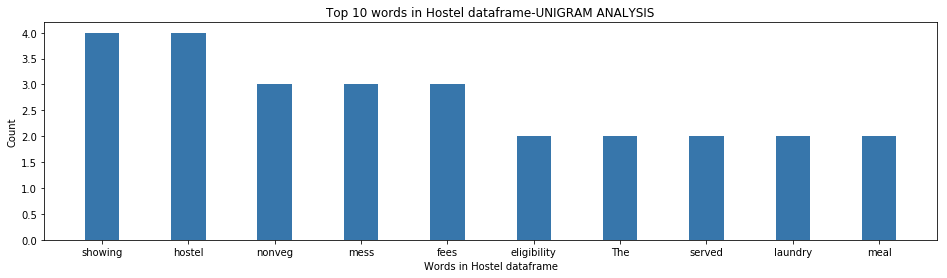

In [121]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='#3776ab',
        width = 0.4)
plt.xlabel("Words in Hostel dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Hostel dataframe-UNIGRAM ANALYSIS")
plt.savefig("Hostel-unigram.png")
plt.show()

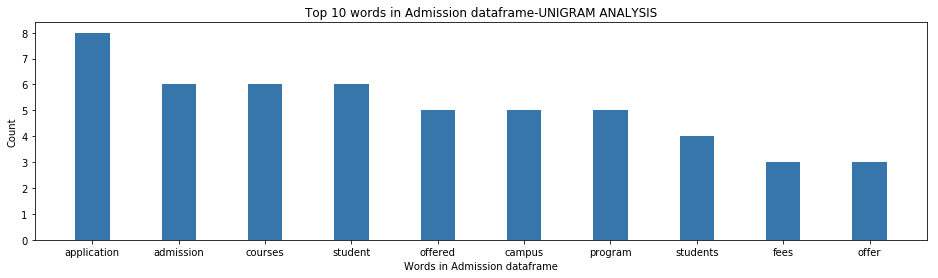

In [122]:
plt.figure(1,figsize=(16,4))
plt.bar(Adm1,Adm2, color ='#3776ab',
        width = 0.4)
plt.xlabel("Words in Admission dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Admission dataframe-UNIGRAM ANALYSIS")
plt.savefig("Admission-unigram.png")
plt.show()

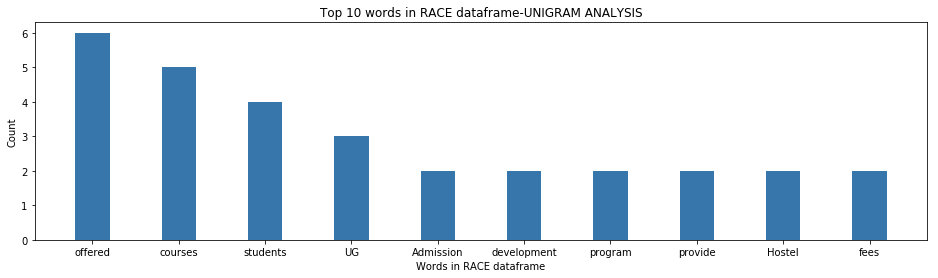

In [123]:
plt.figure(1,figsize=(16,4))
plt.bar(race1,race2, color ='#3776ab',
        width = 0.4)
plt.xlabel("Words in RACE dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in RACE dataframe-UNIGRAM ANALYSIS")
plt.savefig("RACE -unigram.png")
plt.show()

Creating bigrams:

In [124]:
HostelValues2=defaultdict(int)
AdmissionValues2=defaultdict(int)
RACEValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [125]:
#get the count of every word in both the columns of df_train and df_test dataframes where Category  is Admission"
for text in df_train[df_train.Category=="Admission"].Questions:
    for word in generate_N_grams(text,2):
        AdmissionValues2[word]+=1

Sentence after removing stopwords: ['connect', 'admission', 'department']
Sentence after removing stopwords: ['MSc', 'courses', 'offered']
Sentence after removing stopwords: ['MCom', 'courses', 'offered']
Sentence after removing stopwords: ['LLM', 'courses', 'offered']
Sentence after removing stopwords: ['fees', 'paid', 'course']
Sentence after removing stopwords: ['Scholarships', 'offered', 'deserving', 'students']
Sentence after removing stopwords: ['offer', 'sports', 'quota']
Sentence after removing stopwords: ['PGs', 'around']
Sentence after removing stopwords: ['transport', 'available']
Sentence after removing stopwords: ['Cost', 'bus']
Sentence after removing stopwords: ['private']
Sentence after removing stopwords: ['recognized', 'UGC']
Sentence after removing stopwords: ['application', 'timeline', 'admissions']
Sentence after removing stopwords: ['eligibility', 'criteria', 'Architecture', 'admission']
Sentence after removing stopwords: ['application', 'rejected', 'refund']
Sent

In [126]:
#get the count of every word in both the columns of df_train and df_test dataframes where Category  is Academics"
for text in df_train[df_train.Category=="Hostel"].Questions:
    for word in generate_N_grams(text,2):
        HostelValues2[word]+=1

Sentence after removing stopwords: ['MPA', 'courses', 'offered']
Sentence after removing stopwords: ['charge', 'donations']
Sentence after removing stopwords: ['Virtual', 'Campus', 'Tour']
Sentence after removing stopwords: ['eligibility', 'criteria', 'taking', 'admission', 'engineering', 'programs']
Sentence after removing stopwords: ['minimum', 'score', 'JEE', 'Mains']
Sentence after removing stopwords: ['The', 'amount', 'deducted', 'account', 'showing', 'pending', 'dashboard']
Sentence after removing stopwords: ['hostel', 'inside', 'campus']
Sentence after removing stopwords: ['The', 'final', 'degree', 'come', 'VTU']
Sentence after removing stopwords: ['nonveg', 'served', 'mess']
Sentence after removing stopwords: ['hostel', 'fee', 'inclusive', 'laundry', 'mess', 'charges']
Sentence after removing stopwords: ['laundry', 'timings']
Sentence after removing stopwords: ['nonveg', 'served', 'mess']
Sentence after removing stopwords: ['gym', 'hostel', 'fees']
Sentence after removing stopw

In [127]:
#get the count of every word in both the columns of df_train and df_test dataframes where Category  is RACE"
for text in df_train[df_train.Category=="RACE"].Questions:
    for word in generate_N_grams(text,2):
        RACEValues2[word]+=1

Sentence after removing stopwords: ['UG', 'courses', 'offered']
Sentence after removing stopwords: ['Computer', 'Applications', 'courses', 'offered', 'UG']
Sentence after removing stopwords: ['Management', 'BBA', 'courses', 'offered', 'UG']
Sentence after removing stopwords: ['Mtech', 'courses', 'offered']
Sentence after removing stopwords: ['Information', 'number', 'courses', 'offered']
Sentence after removing stopwords: ['enrollment', 'Process', 'International', 'Admission']
Sentence after removing stopwords: ['affiliated']
Sentence after removing stopwords: ['accreditations', 'recognitions', 'Universities']
Sentence after removing stopwords: ['Education', 'loans', 'offered', 'students']
Sentence after removing stopwords: ['Who', 'head', 'career', 'development', 'cell']
Sentence after removing stopwords: ['apply', '1', 'program']
Sentence after removing stopwords: ['Events', 'hosted']
Sentence after removing stopwords: ['working', 'hours']
Sentence after removing stopwords: ['provide

In [128]:
#focus on more frequently occuring words for every Category=>
#sort in DO wrt 2nd column in each of AdmissionValues,AcademicsValues and RACEValues
df_Hostel2=pd.DataFrame(sorted(HostelValues2.items(),key=lambda x:x[1],reverse=True))
df_Admission2=pd.DataFrame(sorted(AdmissionValues2.items(),key=lambda x:x[1],reverse=True))
df_RACE2=pd.DataFrame(sorted(RACEValues2.items(),key=lambda x:x[1],reverse=True))

In [129]:
pd1bi=df_Hostel2[0][:10]
pd2bi=df_Hostel2[1][:10]

In [130]:
ned1bi=df_Admission2[0][:10]
ned2bi=df_Admission2[1][:10]

In [131]:
nud1bi=df_RACE2[0][:10]
nud2bi=df_RACE2[1][:10]

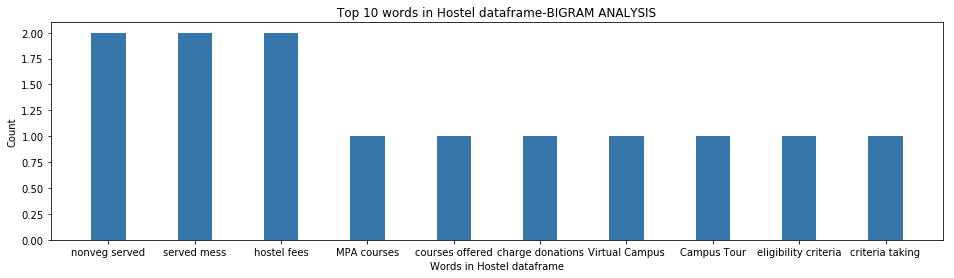

In [133]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='#3776ab',width = 0.4)
plt.xlabel("Words in Hostel dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Hostel dataframe-BIGRAM ANALYSIS")
plt.savefig("Hostel-bigram.png")
plt.show()

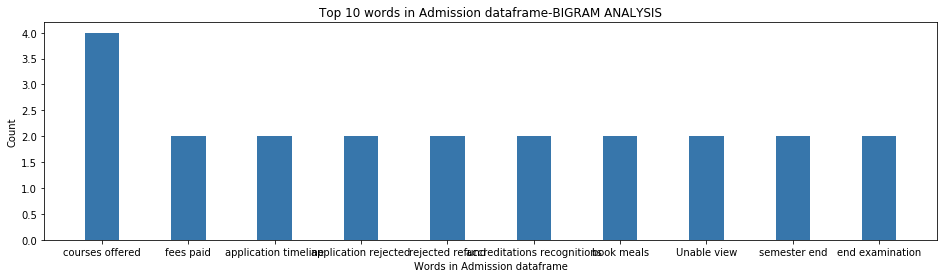

In [134]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='#3776ab',
        width = 0.4)
plt.xlabel("Words in Admission dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Admission dataframe-BIGRAM ANALYSIS")
plt.savefig("Admission-bigram.png")
plt.show()

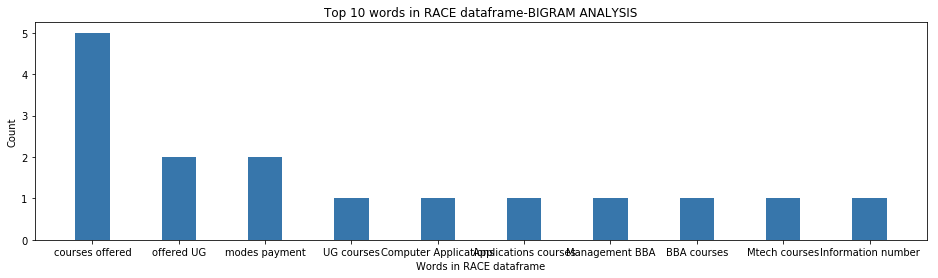

In [135]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='#3776ab',
        width = 0.4)
plt.xlabel("Words in RACE dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in RACE dataframe-BIGRAM ANALYSIS")
plt.savefig("RACE-bigram.png")
plt.show()

In [136]:
# import libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# encode target label
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

# establish input and output
X = list(df['Question'])
y = list(df['Category'])

# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [137]:
#Question will be converted to a bag of words with the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# create a bag of words for only unigrams
cv = CountVectorizer(analyzer = 'word',ngram_range=(1,1), stop_words='english')

# convert training data to bag of words
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [138]:
# import libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
import numpy as np

# train model with different n-gram ranges
for N in range(1,11):
    
    # convert training data to bag of words
    cv = CountVectorizer(analyzer = 'word',ngram_range=(1,N), stop_words='english')
    X_train_cv = cv.fit_transform(X_train)
    X_test_cv = cv.transform(X_test)
    
    # train model and generate predictions
    clf = MultinomialNB()
    clf.fit(X_train_cv, y_train)
    y_pred = clf.predict(X_test_cv)
    
    # compute f-1 score
    score = np.round(f1_score(y_test, y_pred, average='micro'),4)
    print('F-1 score of model with n-gram range of {}: {}'.format((1,N), score))

F-1 score of model with n-gram range of (1, 1): 0.5562
F-1 score of model with n-gram range of (1, 2): 0.55
F-1 score of model with n-gram range of (1, 3): 0.5562
F-1 score of model with n-gram range of (1, 4): 0.5562
F-1 score of model with n-gram range of (1, 5): 0.5562
F-1 score of model with n-gram range of (1, 6): 0.5562
F-1 score of model with n-gram range of (1, 7): 0.5562
F-1 score of model with n-gram range of (1, 8): 0.5562
F-1 score of model with n-gram range of (1, 9): 0.5562
F-1 score of model with n-gram range of (1, 10): 0.5562


In [147]:
### Remove Punctuations and change all words to lower case
import re
def remove_punct(text):    
    words=[word.lower() for word in text.split()] 
    words=[w for word in words for w in re.sub(r'[^\w\s]','',word).split()]    
    return words

df["ques_no_punct"]=df["Question"].apply(remove_punct)
print (df["que_no_punct"])

0         I am unable to connect to admission department
1                        What are the UG courses offered
2      What are the Computer Applications courses off...
3      What are the Arts and Humanity courses offered...
4                 What are the Law courses offered in UG
5        What are the Architecture courses offered in UG
6       What are the Certification program offered in UG
7      What are the Management BBA courses offered in UG
8                        What are the PG courses offered
9                     What are the Mtech courses offered
10                       What are the MA courses offered
11                      What are the MSc courses offered
12                    What are the MPlan courses offered
13                     What are the MCom courses offered
14                      What are the MPA courses offered
15                      What are the MCA courses offered
16                      What are the LLM courses offered
17                      What ar

In [148]:
def negative_words(words):
    counter=False    
    wordlist=[]    
    negatives=["no","not","cant","cannot","never","less","without","barely","hardly","rarely","no","not","noway","didnt"]
    #for words in wordlist:       
    for i,j in enumerate(words):                           
            if j in negatives and i<len(words)-1:             
                wordlist.append(str(words[i]+'-'+words[i+1]))
                counter=True
            else:
                if counter is False:                
                    wordlist.append(words[i])
                else:
                    counter=False
    return wordlist

df["question_negative"]=df["ques_no_punct"].apply(negative_words)
print (df["question_negative"])

0      [i, am, unable, to, connect, to, admission, de...
1                 [what, are, the, ug, courses, offered]
2      [what, are, the, computer, applications, cours...
3      [what, are, the, arts, and, humanity, courses,...
4        [what, are, the, law, courses, offered, in, ug]
5      [what, are, the, architecture, courses, offere...
6      [what, are, the, certification, program, offer...
7      [what, are, the, management, bba, courses, off...
8                 [what, are, the, pg, courses, offered]
9              [what, are, the, mtech, courses, offered]
10                [what, are, the, ma, courses, offered]
11               [what, are, the, msc, courses, offered]
12             [what, are, the, mplan, courses, offered]
13              [what, are, the, mcom, courses, offered]
14               [what, are, the, mpa, courses, offered]
15               [what, are, the, mca, courses, offered]
16               [what, are, the, llm, courses, offered]
17               [what, are, th

In [149]:
### Recreate the sentence
def Recreate(text):
    word=" ".join(text)
    return word

df["modified_questions"]=df["question_negative"].apply(Recreate)
print (df["modified_questions"])

0         i am unable to connect to admission department
1                        what are the ug courses offered
2      what are the computer applications courses off...
3      what are the arts and humanity courses offered...
4                 what are the law courses offered in ug
5        what are the architecture courses offered in ug
6       what are the certification program offered in ug
7      what are the management bba courses offered in ug
8                        what are the pg courses offered
9                     what are the mtech courses offered
10                       what are the ma courses offered
11                      what are the msc courses offered
12                    what are the mplan courses offered
13                     what are the mcom courses offered
14                      what are the mpa courses offered
15                      what are the mca courses offered
16                      what are the llm courses offered
17                      what ar

In [150]:
### Let's change the sentence into a bag of word model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["modified_questions"]).toarray()
print(X)
print(vectorizer.get_feature_names())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
['100', '16', '404', 'abled', 'about', 'abroad', 'academic', 'accepting', 'access', 'accommodation', 'account', 'accounting', 'accreditations', 'accredited', 'action', 'activities', 'administration', 'admission', 'admissions', 'affiliated', 'after', 'against', 'ai', 'aicte', 'aided', 'airconditioned', 'airport', 'all', 'allow', 'allowed', 'along', 'alumni', 'alumnus', 'am', 'amount', 'an', 'analytics', 'and', 'android', 'animation', 'announced', 'another', 'answer', 'antiragging', 'any', 'app', 'applicant', 'application', 'applications', 'applied', 'apply', 'applying', 'approach', 'approval', 'approved', 'architecture', 'are', 'around', 'arranged', 'arrangement', 'arrangements', 'artificial', 'arts', 'as', 'assessment', 'assigned', 'assignment', 'assignments', 'assistance', 'assisted', 'at', 'atithi', 'attend', 'attendance', 'attending', 'audio', 'automation', 'autono

In [151]:
def Cleaning_questions(text):
    No_text_punctuation=remove_punct(text)
    No_Negative_words=negative_words(No_text_punctuation)
    #text_stem=Stem(No_Negative_words)
    final_questions=Recreate(No_Negative_words)
    return final_questions
df["modified_Questions"]=df["Question"].apply(Cleaning_questions)
print (df["modified_Questions"])

0         i am unable to connect to admission department
1                        what are the ug courses offered
2      what are the computer applications courses off...
3      what are the arts and humanity courses offered...
4                 what are the law courses offered in ug
5        what are the architecture courses offered in ug
6       what are the certification program offered in ug
7      what are the management bba courses offered in ug
8                        what are the pg courses offered
9                     what are the mtech courses offered
10                       what are the ma courses offered
11                      what are the msc courses offered
12                    what are the mplan courses offered
13                     what are the mcom courses offered
14                      what are the mpa courses offered
15                      what are the mca courses offered
16                      what are the llm courses offered
17                      what ar

In [152]:
questions=df['modified_Questions'].values.tolist()


In [153]:
labels=df['S.No'].values.tolist()

In [154]:
answers=df['Answers'].values.tolist()

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 639
Data columns (total 9 columns):
S.No                  640 non-null int64
Question              640 non-null object
Category              640 non-null int64
Answers               640 non-null object
que_no_punct          640 non-null object
ques_no_punct         640 non-null object
question_negative     640 non-null object
modified_questions    640 non-null object
modified_Questions    640 non-null object
dtypes: int64(2), object(7)
memory usage: 70.0+ KB


In [156]:
bow_vectorizer = CountVectorizer()

In [157]:
training_vectors = bow_vectorizer.fit_transform(questions)

In [158]:
classifier = MultinomialNB()
classifier.fit(training_vectors, labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [159]:
y_pred=classifier.predict(training_vectors)

In [160]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [161]:
accuracy_score(labels,y_pred)

0.965625

In [162]:
print(classification_report(labels,y_pred))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         1
          2       1.00      1.00      1.00         1
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         1
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         1
          8       1.00      1.00      1.00         1
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         1
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         1
         13       1.00      1.00      1.00         1
         14       1.00      1.00      1.00         1
         15       1.00      1.00      1.00         1
         16       1.00      1.00      1.00         1
         17       1.00      1.00      1.00         1
         18       1.00      1.00      1.00   

C:\Users\vinayajx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [163]:
confusion_matrix(labels,y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [164]:
class ChatBot:
    exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later", "stop")
    def start_chat(self):
        user_response = input("Hi, I'm a bot,How can i help you?\n")
        self.chat(Cleaning_questions(user_response))
  
    def chat(self, reply):
        while not self.make_exit(reply):
            reply = input(self.generate_response(reply)+"\n")
        return
  
    def generate_response(self, ans):
        input_vector = bow_vectorizer.transform([ans])
        predict = classifier.predict(input_vector)
        index = int(predict[0])
        #print("Accurate:",str(classifier.predict_proba(input_vector)[0][index-1] * 1000)[:5] + "%")
        return answers[index-1]
        print()
    def make_exit(self, reply):
        for exit_command in self.exit_commands:
            if exit_command in reply:
                print("Ok, have a great day!")
                return True
        return False

In [30]:
etcetera = ChatBot()
etcetera.start_chat()

Hi, I'm a bot,How can i help you?
hi
Hi there
tell me about reva university
Yes, REVA University is a Private University established under REVA University Act 2012.
What are the Law courses offered in UG
1.	Bachelor of Arts and Bachelor of Laws (B.A., LL. B. Honours)
2. 	Bachelor of Business Administration and Bachelor of Law (BBA., LL. B. Honours)
How is life at REVA?
Now, just imagine that as a student, you will be exposed to a variety of student clubs and committees for extra-curricular, industrial trips and internships, Snacks at the food court, sports & gym facilities, cultural fest (REVOTHSAVA) and allied events (Smart India Hackathon), organized outings, weekend movies and much more. Here is the dream life you have been waiting for.
bye
Ok, have a great day!


In [165]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(training_vectors, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [166]:
y_pred=classifier.predict(training_vectors)

In [167]:
accuracy_score(labels,y_pred)

0.9671875

In [168]:
confusion_matrix(labels,y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [46]:
etcetera = ChatBot()
etcetera.start_chat()

Hi, I'm a bot,How can i help you?
hi
Checkhttps://ruerp.reva.edu.in/website to view the fees due.
Cost of the guest house for parents?
Checkhttps://ruerp.reva.edu.in/website to view the fees due.
What is the usual academic year?
BTech  August
MTech  Last week of August
Non-engineering  June
Is REVA University a private or deemed University?
REVA CET is the Common Entrance Test conducted by REVA University for admission into its various programs. REVA CET forms the basis of eligibility for some of the programmes offered by REVA University along with scholarship. Visit website https://www.revacet.com/
What do I do if I am sick?
Your warden should give written permission to your friend and your friend will carry your mobile or smart card to scan the QR code and pick up the meals.
bye
Ok, have a great day!


In [169]:
#SVM
from sklearn.svm import SVC  
classifier = SVC(kernel='linear',probability=True) 
  
# fitting x samples and y classes 
classifier.fit(training_vectors, labels) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [170]:
y_pred=classifier.predict(training_vectors)

In [171]:
confusion_matrix(labels,y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [172]:
accuracy_score(labels,y_pred)

0.9671875

In [48]:
etcetera = ChatBot()
etcetera.start_chat()

Hi, I'm a bot,How can i help you?
hi
Hi there
Do you have NCC and NSS?
Yes, REVA University have both NSS and NCC. Regular activities like drill, refile drill, map reading, weapon training, field craft and battle craft to name a few are being imparted to the cadets as per the syllabus framed by NCC directorate, Bengaluru for NCC. NSS is associated with creating awareness program on various topics like global warming, sanitation and ODF, swachh bharat etc. Also, NSS and NCC offered as open elective to all the programs 
Do you have health center?
Yes, well-equipped Health care Centre headed by a full time Resident Doctor and supported by paramedical staff is located on the campus.
What are the application timeline for the admission?
The application have varied timelines. For details www.reva.edu.in 
Is NATA compulsory for architecture students?
Yes, NATA is compulsory for architecture students.
quit
Ok, have a great day!


In [173]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(training_vectors, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [174]:
y_pred=classifier.predict(training_vectors)

In [175]:
accuracy_score(labels,y_pred)

0.1078125

In [176]:
confusion_matrix(labels,y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
etcetera = ChatBot()
etcetera.start_chat()

Hi, I'm a bot,How can i help you?
hi
Check the academic calendar
How many days of Maternity leave/Matrimonial as per the leave policy.
45+ acres of lush green campus.
What do we do if we miss swipe?
Your warden should give written permission to your friend and your friend will carry your mobile or smart card to scan the QR code and pick up the meals.
Do you offer B.SC. IN NUTRITION AND DIETETICS?
Yes, we offer M.SC. IN PHYSICS
What are the prerequisites to join corporate programs?
LLM in Business and Corporate Law   (1 Year)
LLM in Criminal Law
bye
Ok, have a great day!


In [177]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')
classifier.fit(training_vectors, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [178]:
confusion_matrix(labels,y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [179]:
accuracy_score(labels,y_pred)

0.1078125

In [23]:
etcetera = ChatBot()
etcetera.start_chat()

Hi, I'm a bot,How can i help you?
hi
Hi there
Does REVA University have its own syllabus?
Yes, REVA University has its own syllabus.
Events hosted at REVA university
Now, just imagine that as a student, you will be exposed to a variety of student clubs and committees for extra-curricular, industrial trips and internships, Snacks at the food court, sports & gym facilities, cultural fest (REVOTHSAVA) and allied events (Smart India Hackathon), organized outings, weekend movies and much more. Here is the dream life you have been waiting for.
When can an application get rejected and will I get a refund?
Incorrectly filled, incomplete and unsigned applications are rejected.
Application once rejected will not be reconsidered and application cost will not be refunded.
Does REVA have a hostel?
Yes
bye
Ok, have a great day!


In [31]:
import joblib

In [32]:
joblib.dump(bow_vectorizer,"bow_vectorizer.joblib")
joblib.dump(classifier,"model_MNB.joblib")

['model_MNB.joblib']

In [33]:
import pyttsx3
import speech_recognition as sr

In [ ]:
import speech_recognition
 
# The Recognizer is initialized.
UserVoiceRecognizer = speech_recognition.Recognizer()
 
while(1):
    try:
 
        with speech_recognition.Microphone() as UserVoiceInputSource:
 
            UserVoiceRecognizer.adjust_for_ambient_noise(UserVoiceInputSource, duration=0.5)
 
            # The Program listens to the user voice input.
            UserVoiceInput = UserVoiceRecognizer.listen(UserVoiceInputSource)
 
            UserVoiceInput_converted_to_Text = UserVoiceRecognizer.recognize_google(UserVoiceInput)
            UserVoiceInput_converted_to_Text = UserVoiceInput_converted_to_Text.lower()
            print(UserVoiceInput_converted_to_Text)
    
    except KeyboardInterrupt:
        print('A KeyboardInterrupt encountered; Terminating the Program !!!')
        exit(0)
    
    except speech_recognition.UnknownValueError:
        print("No User Voice detected OR unintelligible noises detected OR the recognized audio cannot be matched to text !!!")


hello
do engineering if i have not taken mathematics in puc
unable to connect admission department i am unable to connect to admission department want are the computer application courses offered in ug
what are the law courses offered in ug
what are the mtech courses offered what are the courses offered in ug
what are the mtech courses offered
A KeyboardInterrupt encountered; Terminating the Program !!!
A KeyboardInterrupt encountered; Terminating the Program !!!
A KeyboardInterrupt encountered; Terminating the Program !!!
No User Voice detected OR unintelligible noises detected OR the recognized audio cannot be matched to text !!!
No User Voice detected OR unintelligible noises detected OR the recognized audio cannot be matched to text !!!


In [1]:
import speech_recognition as sr
r = sr.Recognizer()
with sr.Microphone() as source:
    print("recording started...")
    audio = r.listen(source,phrase_time_limit=10)
    print("finished recording")

recording started...
finished recording


In [ ]:
try:
    print("You said " + r.recognize_google(audio))  
except LookupError:                          
    print("Could not understand audio")